<a href="https://colab.research.google.com/github/Aditya-Shandilya1182/LeNet_5_MNIST/blob/main/LeNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# LeNet-5

![image.png](https://d2l.ai/_images/lenet.svg)
Cx, Sx, Fx are corresponding to the convolutional layer, sub-sampling layer (a.k.a pooling layer), and fully connected layer, respectively, where x denotes the layer index.

Input Image : 28 x 28



# MNIST DATA

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


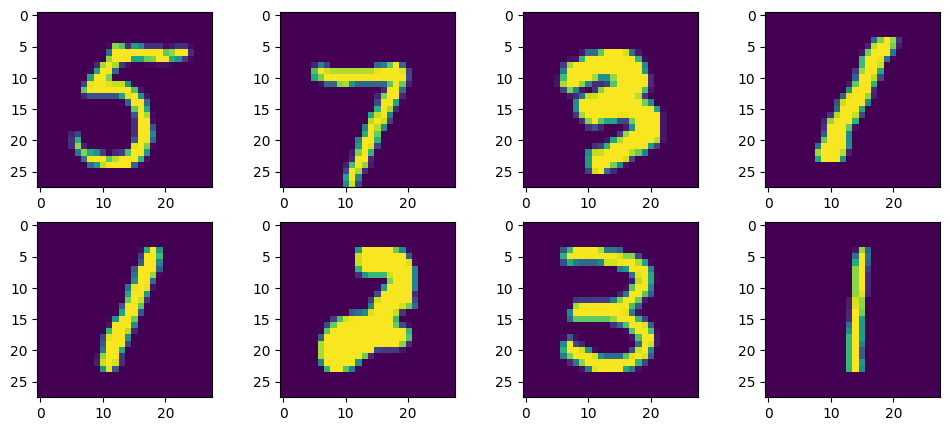

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize = (12, 5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

# Pre-processing Data

In [ ]:
from keras.utils import to_categorical

def prepareData(X_train, y_train, X_test, y_test):

  #Reshaping Images as required
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  #Normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0

  #OneHotEncoding
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test



# LeNet Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.metrics import categorical_crossentropy

tf.random.set_seed(42)

MNIST_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 6,
                           kernel_size = (5,5),
                           padding = 'same',
                           activation = 'relu',
                           input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 16,
                           kernel_size = (5,5),
                           activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

MNIST_model.compile(loss = categorical_crossentropy,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])


In [ ]:
MNIST_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

# Training

In [ ]:
def modelSummary(history):
  plt.figure(figsize = (10, 6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):

  #Pre-Processing
  X_train, y_train, X_test, y_test = prepareData(X_train, y_train, X_test, y_test)

  model_history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                      steps_per_epoch = X_train.shape[0]//batch_size,
                      validation_data = (X_test, y_test),
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)

  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))

  modelSummary(model_history)


Epoch 1/50
468/468 [==============================] - 51s 109ms/step - loss: 1.0961e-05 - accuracy: 1.0000 - val_loss: 16.9122 - val_accuracy: 0.9907
Epoch 2/50
468/468 [==============================] - 36s 78ms/step - loss: 1.0236e-05 - accuracy: 1.0000 - val_loss: 16.5408 - val_accuracy: 0.9904
Epoch 3/50
468/468 [==============================] - 33s 70ms/step - loss: 7.4693e-06 - accuracy: 1.0000 - val_loss: 17.0073 - val_accuracy: 0.9907
Epoch 4/50
468/468 [==============================] - 33s 71ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 28.7692 - val_accuracy: 0.9787
Epoch 5/50
468/468 [==============================] - 32s 68ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 18.2283 - val_accuracy: 0.9869
Epoch 6/50
468/468 [==============================] - 33s 70ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 16.4554 - val_accuracy: 0.9879
Epoch 7/50
468/468 [==============================] - 32s 68ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 19.

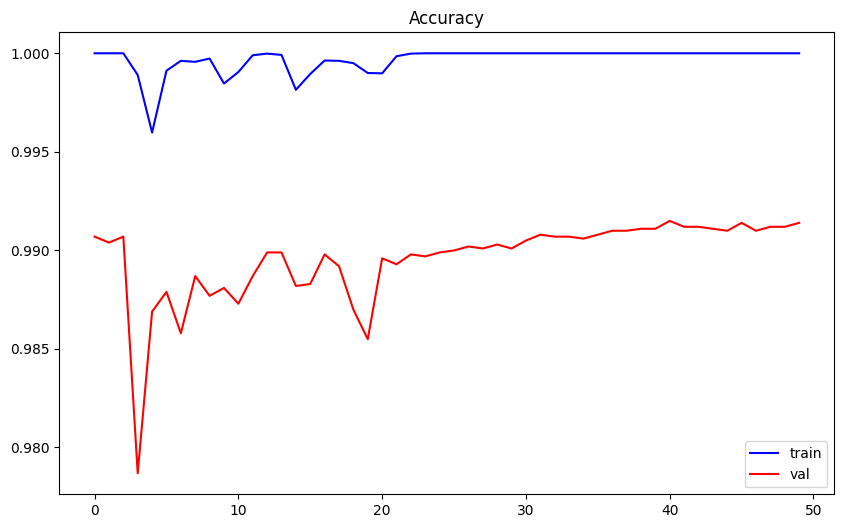

In [ ]:
train_model(MNIST_model, X_train, y_train, X_test, y_test, 50, 128)

# Predictions

In [ ]:
import numpy as np

def predict(model, X_test):
  y_test_pred = []

  for i in range(len(X_test)):
    img = X_test[i]
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0

    vec_output = model.predict(img)

    y_p = np.argmax(vec_output)
    y_test_pred.append(y_p)

  y_test_pred = np.asarray(y_test_pred)

  return y_test_pred


In [ ]:
test_pred = predict(MNIST_model, X_test);

Text(70.72222222222221, 0.5, 'True classes')

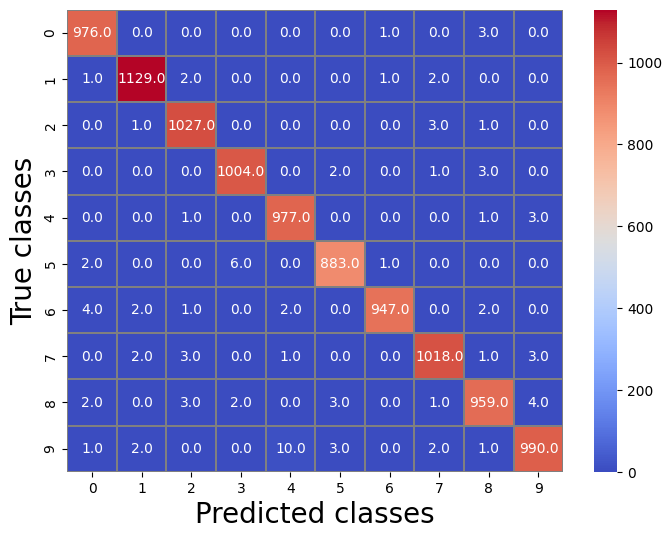

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

con_mat = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'coolwarm', linecolor = 'gray',
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)